# Credit card eligibility:- EDA and Classification

Description of the Credit Card Eligibility Data: Determining Factors

The Credit Card Eligibility Dataset: Determining Factors is a comprehensive collection of variables aimed at understanding the factors that influence an individual's eligibility for a credit card. This dataset encompasses a wide range of demographic, financial, and personal attributes that are commonly considered by financial institutions when assessing an individual's suitability for credit.

Each row in the dataset represents a unique individual, identified by a unique ID, with associated attributes ranging from basic demographic information such as gender and age, to financial indicators like total income and employment status. Additionally, the dataset includes variables related to familial status, housing, education, and occupation, providing a holistic view of the individual's background and circumstances.

Variable	Description
ID	An identifier for each individual (customer).
Gender	The gender of the individual.
Own_car	A binary feature indicating whether the individual owns a car.
Own_property	A binary feature indicating whether the individual owns a property.
Work_phone	A binary feature indicating whether the individual has a work phone.
Phone	A binary feature indicating whether the individual has a phone.
Email	A binary feature indicating whether the individual has provided an email address.
Unemployed	A binary feature indicating whether the individual is unemployed.
Num_children	The number of children the individual has.
Num_family	The total number of family members.
Account_length	The length of the individual's account with a bank or financial institution.
Total_income	The total income of the individual.
Age	The age of the individual.
Years_employed	The number of years the individual has been employed.
Income_type	The type of income (e.g., employed, self-employed, etc.).
Education_type	The education level of the individual.
Family_status	The family status of the individual.
Housing_type	The type of housing the individual lives in.
Occupation_type	The type of occupation the individual is engaged in.
Target	The target variable for the classification task, indicating whether the individual is eligible for a credit card or not (e.g., Yes/No, 1/0).
Researchers, analysts, and financial institutions can leverage this dataset to gain insights into the key factors influencing credit card eligibility and to develop predictive models that assist in automating the credit assessment process. By understanding the relationship between various attributes and credit card eligibility, stakeholders can make more informed decisions, improve risk assessment strategies, and enhance customer targeting and segmentation efforts.

This dataset is valuable for a wide range of applications within the financial industry, including credit risk management, customer relationship management, and marketing analytics. Furthermore, it provides a valuable resource for academic research and educational purposes, enabling students and researchers to explore the intricate dynamics of credit card eligibility determination

### Importing the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import plot_confusion_matrix,accuracy_score,classification_report

from warnings import filterwarnings 
filterwarnings('ignore')

In [2]:
original_df=pd.read_csv('credit_cards_data.csv')

In [3]:
df1=pd.read_csv('credit_cards_data.csv')
df1

ID  Gender  Own_car  Own_property  Work_phone  Phone  Email  \
0     5008804       1        1             1           1      0      0   
1     5008806       1        1             1           0      0      0   
2     5008808       0        0             1           0      1      1   
3     5008812       0        0             1           0      0      0   
4     5008815       1        1             1           1      1      1   
...       ...     ...      ...           ...         ...    ...    ...   
9704  5148694       0        0             0           0      0      0   
9705  5149055       0        0             1           1      1      0   
9706  5149729       1        1             1           0      0      0   
9707  5149838       0        0             1           0      1      1   
9708  5150337       1        0             1           0      0      0   

      Unemployed  Num_children  Num_family  Account_length  Total_income  \
0              0             0           2              15      427500.0   
1              0             0           2              29      112500.0   
2              0             0           1               4      270000.0   
3              1             0           1              20      283500.0   
4              0             0           2               5      270000.0   
...          ...           ...         ...             ...           ...   
9704           0             0           2              20      180000.0   
9705           0             0           2              19      112500.0   
9706           0             0           2              21       90000.0   
9707           0             0           2              32      157500.0   
9708           0             0           1              13      112500.0   

            Age  Years_employed           Income_type  \
0     32.868574       12.435574               Working   
1     58.793815        3.104787               Working   
2     52.321403        8.353354  Commercial associate   
3     61.504343        0.000000             Pensioner   
4     46.193967        2.105450               Working   
...         ...             ...                   ...   
9704  56.400884        0.542106             Pensioner   
9705  43.360233        7.375921  Commercial associate   
9706  52.296762        4.711938               Working   
9707  33.914454        3.627727             Pensioner   
9708  25.155890        3.266323               Working   

                     Education_type         Family_status  \
0                  Higher education        Civil marriage   
1     Secondary / secondary special               Married   
2     Secondary / secondary special  Single / not married   
3                  Higher education             Separated   
4                  Higher education               Married   
...                             ...                   ...   
9704  Secondary / secondary special        Civil marriage   
9705  Secondary / secondary special               Married   
9706  Secondary / secondary special               Married   
9707               Higher education               Married   
9708  Secondary / secondary special  Single / not married   

             Housing_type Occupation_type  Target  
0        Rented apartment           Other       1  
1       House / apartment  Security staff       0  
2       House / apartment     Sales staff       0  
3       House / apartment           Other       0  
4       House / apartment     Accountants       0  
...                   ...             ...     ...  
9704  Municipal apartment        Laborers       1  
9705    House / apartment           Other       1  
9706    House / apartment           Other       1  
9707    House / apartment  Medicine staff       1  
9708     Rented apartment        Laborers       1  

[9709 rows x 20 columns]

In [4]:
df=original_df
df.head(5)

ID  Gender  Own_car  Own_property  Work_phone  Phone  Email  \
0  5008804       1        1             1           1      0      0   
1  5008806       1        1             1           0      0      0   
2  5008808       0        0             1           0      1      1   
3  5008812       0        0             1           0      0      0   
4  5008815       1        1             1           1      1      1   

   Unemployed  Num_children  Num_family  Account_length  Total_income  \
0           0             0           2              15      427500.0   
1           0             0           2              29      112500.0   
2           0             0           1               4      270000.0   
3           1             0           1              20      283500.0   
4           0             0           2               5      270000.0   

         Age  Years_employed           Income_type  \
0  32.868574       12.435574               Working   
1  58.793815        3.104787               Working   
2  52.321403        8.353354  Commercial associate   
3  61.504343        0.000000             Pensioner   
4  46.193967        2.105450               Working   

                  Education_type         Family_status       Housing_type  \
0               Higher education        Civil marriage   Rented apartment   
1  Secondary / secondary special               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3               Higher education             Separated  House / apartment   
4               Higher education               Married  House / apartment   

  Occupation_type  Target  
0           Other       1  
1  Security staff       0  
2     Sales staff       0  
3           Other       0  
4     Accountants       0

## Understanding the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               9709 non-null   int64  
 1   Gender           9709 non-null   int64  
 2   Own_car          9709 non-null   int64  
 3   Own_property     9709 non-null   int64  
 4   Work_phone       9709 non-null   int64  
 5   Phone            9709 non-null   int64  
 6   Email            9709 non-null   int64  
 7   Unemployed       9709 non-null   int64  
 8   Num_children     9709 non-null   int64  
 9   Num_family       9709 non-null   int64  
 10  Account_length   9709 non-null   int64  
 11  Total_income     9709 non-null   float64
 12  Age              9709 non-null   float64
 13  Years_employed   9709 non-null   float64
 14  Income_type      9709 non-null   object 
 15  Education_type   9709 non-null   object 
 16  Family_status    9709 non-null   object 
 17  Housing_type  

## Categorical coloumns analysis

### combinning the categorical coloumns together

In [6]:
categorical_cols  = df.iloc[:,-6:-1]
categorical_cols

Income_type                 Education_type  \
0                  Working               Higher education   
1                  Working  Secondary / secondary special   
2     Commercial associate  Secondary / secondary special   
3                Pensioner               Higher education   
4                  Working               Higher education   
...                    ...                            ...   
9704             Pensioner  Secondary / secondary special   
9705  Commercial associate  Secondary / secondary special   
9706               Working  Secondary / secondary special   
9707             Pensioner               Higher education   
9708               Working  Secondary / secondary special   

             Family_status         Housing_type Occupation_type  
0           Civil marriage     Rented apartment           Other  
1                  Married    House / apartment  Security staff  
2     Single / not married    House / apartment     Sales staff  
3                Separated    House / apartment           Other  
4                  Married    House / apartment     Accountants  
...                    ...                  ...             ...  
9704        Civil marriage  Municipal apartment        Laborers  
9705               Married    House / apartment           Other  
9706               Married    House / apartment           Other  
9707               Married    House / apartment  Medicine staff  
9708  Single / not married     Rented apartment        Laborers  

[9709 rows x 5 columns]

In [7]:
for i,column in enumerate(categorical_cols):
    print(f'{column}\n{df[column].value_counts()}\n')    

Income_type
Working                 4960
Commercial associate    2312
Pensioner               1712
State servant            722
Student                    3
Name: Income_type, dtype: int64

Education_type
Secondary / secondary special    6761
Higher education                 2457
Incomplete higher                 371
Lower secondary                   114
Academic degree                     6
Name: Education_type, dtype: int64

Family_status
Married                 6530
Single / not married    1359
Civil marriage           836
Separated                574
Widow                    410
Name: Family_status, dtype: int64

Housing_type
House / apartment      8684
With parents            448
Municipal apartment     323
Rented apartment        144
Office apartment         76
Co-op apartment          34
Name: Housing_type, dtype: int64

Occupation_type
Other                    2994
Laborers                 1724
Sales staff               959
Core staff                877
Managers                

In [8]:
binary_cols = ['Gender','Own_car', 'Own_property', 'Work_phone', 'Phone', 'Email', 'Unemployed']

for i,column in enumerate(binary_cols):
    print(f'{column}\n{df[column].value_counts()}\n') 

Gender
0    6323
1    3386
Name: Gender, dtype: int64

Own_car
0    6139
1    3570
Name: Own_car, dtype: int64

Own_property
1    6520
0    3189
Name: Own_property, dtype: int64

Work_phone
0    7598
1    2111
Name: Work_phone, dtype: int64

Phone
0    6916
1    2793
Name: Phone, dtype: int64

Email
0    8859
1     850
Name: Email, dtype: int64

Unemployed
0    8013
1    1696
Name: Unemployed, dtype: int64



In [9]:
df.isnull().sum()

ID                 0
Gender             0
Own_car            0
Own_property       0
Work_phone         0
Phone              0
Email              0
Unemployed         0
Num_children       0
Num_family         0
Account_length     0
Total_income       0
Age                0
Years_employed     0
Income_type        0
Education_type     0
Family_status      0
Housing_type       0
Occupation_type    0
Target             0
dtype: int64

## Since there are no missing entries we go head with the data analysis task

### Countplot for the categorical coloumns

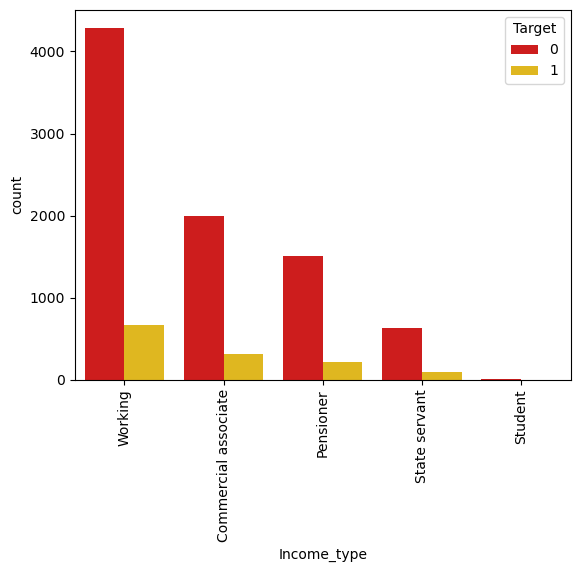

In [10]:
plt.plot(figsize=(10,6))
sns.countplot(data=df,x='Income_type',hue='Target',palette='hot')
plt.xticks(rotation=90);  

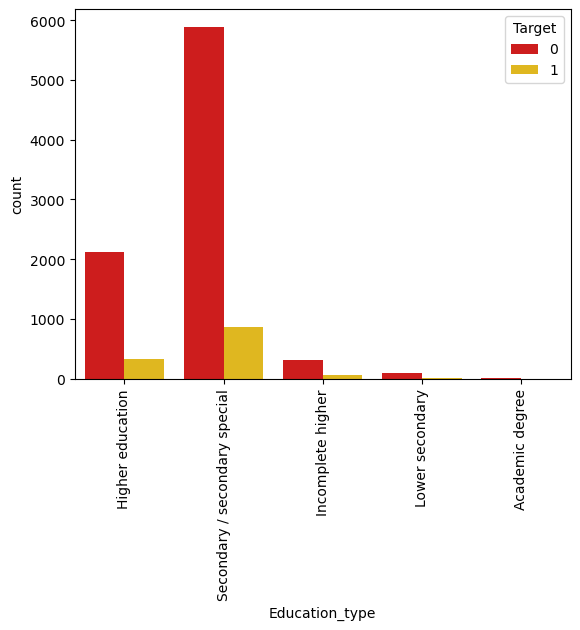

In [11]:
plt.plot(figsize=(10,6))
sns.countplot(data=df,x='Education_type',hue='Target',palette='hot')
plt.xticks(rotation=90);

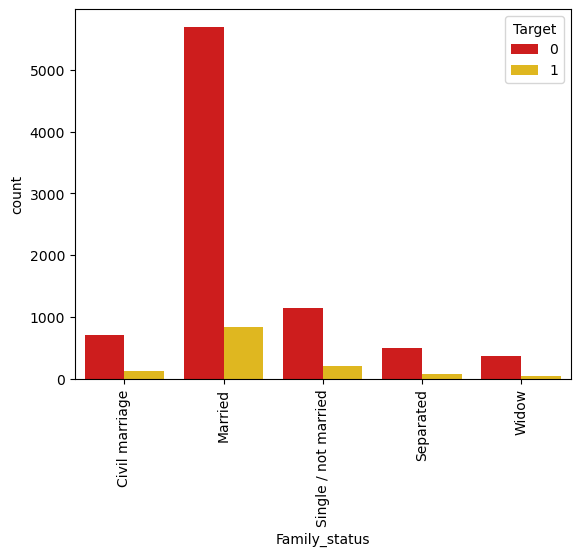

In [12]:
plt.plot(figsize=(10,6))
sns.countplot(data=df,x='Family_status',hue='Target',palette='hot')
plt.xticks(rotation=90);

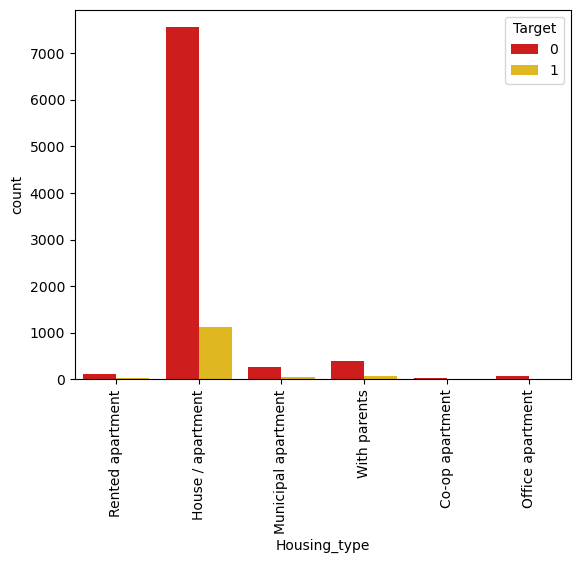

In [13]:
plt.plot(figsize=(10,6))
sns.countplot(data=df,x='Housing_type',hue='Target',palette='hot')
plt.xticks(rotation=90);

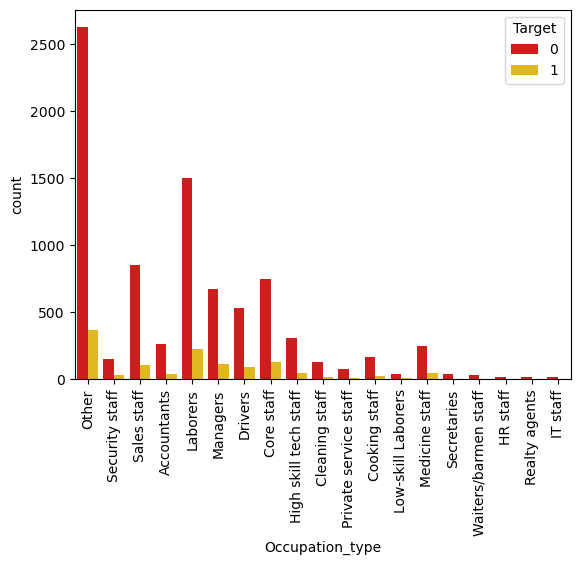

In [14]:
plt.plot(figsize=(15,15),dpi=200),
sns.countplot(data=df,x='Occupation_type',hue='Target',palette='hot')
plt.xticks(rotation=90);

### Assigning categories instead of 0 and 1

In [15]:
df['Gender'] = df['Gender'].map({0: 'Male', 1: 'Female'})

In [16]:
df['Own_car'] = df['Own_car'].map({0: 'No', 1: 'Yes'})

In [17]:
df['Own_property'] = df['Own_property'].map({0: 'No', 1: 'Yes'})

In [18]:
df['Work_phone'] = df['Work_phone'].map({0: 'No', 1: 'Yes'})

In [19]:
df['Phone'] = df['Phone'].map({0: 'No', 1: 'Yes'})

In [20]:
df['Email'] = df['Email'].map({0: 'No', 1: 'Yes'})

In [21]:
df['Unemployed'] = df['Unemployed'].map({0: 'No', 1: 'Yes'})

In [22]:
df['Target'] = df['Target'].map({0: 'Not eligible', 1: 'Eligible'})
df

ID  Gender Own_car Own_property Work_phone Phone Email Unemployed  \
0     5008804  Female     Yes          Yes        Yes    No    No         No   
1     5008806  Female     Yes          Yes         No    No    No         No   
2     5008808    Male      No          Yes         No   Yes   Yes         No   
3     5008812    Male      No          Yes         No    No    No        Yes   
4     5008815  Female     Yes          Yes        Yes   Yes   Yes         No   
...       ...     ...     ...          ...        ...   ...   ...        ...   
9704  5148694    Male      No           No         No    No    No         No   
9705  5149055    Male      No          Yes        Yes   Yes    No         No   
9706  5149729  Female     Yes          Yes         No    No    No         No   
9707  5149838    Male      No          Yes         No   Yes   Yes         No   
9708  5150337  Female      No          Yes         No    No    No         No   

      Num_children  Num_family  Account_length  Total_income        Age  \
0                0           2              15      427500.0  32.868574   
1                0           2              29      112500.0  58.793815   
2                0           1               4      270000.0  52.321403   
3                0           1              20      283500.0  61.504343   
4                0           2               5      270000.0  46.193967   
...            ...         ...             ...           ...        ...   
9704             0           2              20      180000.0  56.400884   
9705             0           2              19      112500.0  43.360233   
9706             0           2              21       90000.0  52.296762   
9707             0           2              32      157500.0  33.914454   
9708             0           1              13      112500.0  25.155890   

      Years_employed           Income_type                 Education_type  \
0          12.435574               Working               Higher education   
1           3.104787               Working  Secondary / secondary special   
2           8.353354  Commercial associate  Secondary / secondary special   
3           0.000000             Pensioner               Higher education   
4           2.105450               Working               Higher education   
...              ...                   ...                            ...   
9704        0.542106             Pensioner  Secondary / secondary special   
9705        7.375921  Commercial associate  Secondary / secondary special   
9706        4.711938               Working  Secondary / secondary special   
9707        3.627727             Pensioner               Higher education   
9708        3.266323               Working  Secondary / secondary special   

             Family_status         Housing_type Occupation_type        Target  
0           Civil marriage     Rented apartment           Other      Eligible  
1                  Married    House / apartment  Security staff  Not eligible  
2     Single / not married    House / apartment     Sales staff  Not eligible  
3                Separated    House / apartment           Other  Not eligible  
4                  Married    House / apartment     Accountants  Not eligible  
...                    ...                  ...             ...           ...  
9704        Civil marriage  Municipal apartment        Laborers      Eligible  
9705               Married    House / apartment           Other      Eligible  
9706               Married    House / apartment           Other      Eligible  
9707               Married    House / apartment  Medicine staff      Eligible  
9708  Single / not married     Rented apartment        Laborers      Eligible  

[9709 rows x 20 columns]

### Data visualization for certain categories with stacked bar plot based on whether they are 'Eligible' or 'Not eligible'

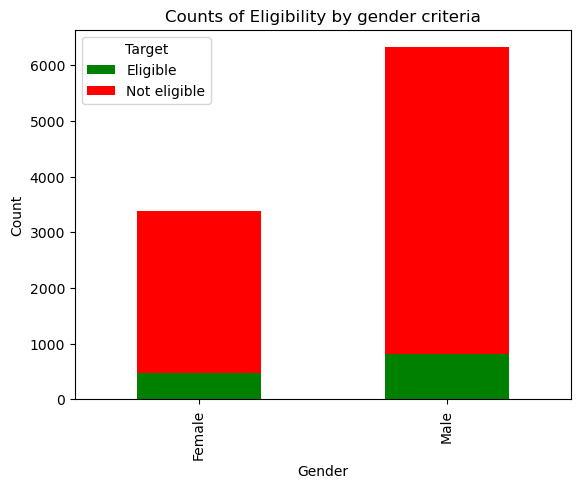

In [23]:
gender_target_counts = df.groupby(['Gender', 'Target']).size().unstack()
gender_target_counts.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Counts of Eligibility by gender criteria')
plt.legend(title='Target')
plt.show()

* A major proportion of the set is male and most of them are not eligible 

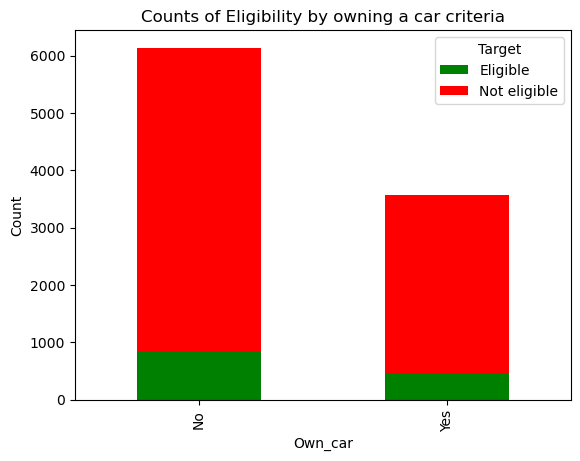

In [24]:
gender_target_counts = df.groupby(['Own_car', 'Target']).size().unstack()
gender_target_counts.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.xlabel('Own_car')
plt.ylabel('Count')
plt.title('Counts of Eligibility by owning a car criteria')
plt.legend(title='Target')
plt.show()

* A major proportion of the people do not own a car and the majority of them is not eligible 

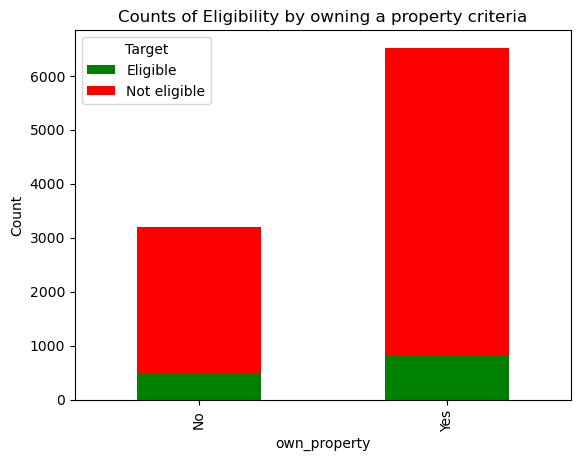

In [25]:
gender_target_counts = df.groupby(['Own_property', 'Target']).size().unstack()
gender_target_counts.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.xlabel('own_property')
plt.ylabel('Count')
plt.title('Counts of Eligibility by owning a property criteria')
plt.legend(title='Target')
plt.show()

* A major proportion of the people owns propery and the majority of them is not eligible

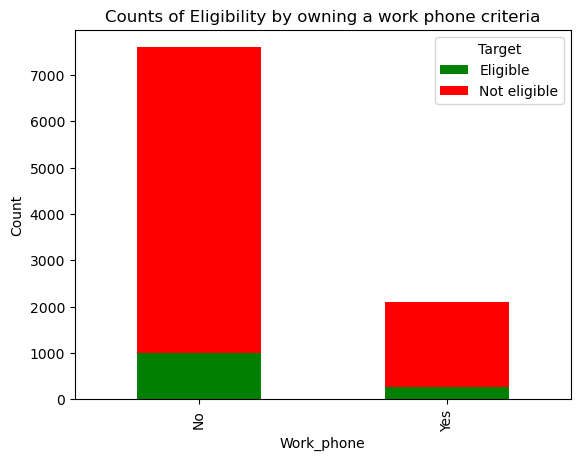

In [26]:
gender_target_counts = df.groupby(['Work_phone', 'Target']).size().unstack()
gender_target_counts.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.xlabel('Work_phone')
plt.ylabel('Count')
plt.title('Counts of Eligibility by owning a work phone criteria')
plt.legend(title='Target')
plt.show()

* A major proportion of the people do not own work phone and the majority of them is not eligible

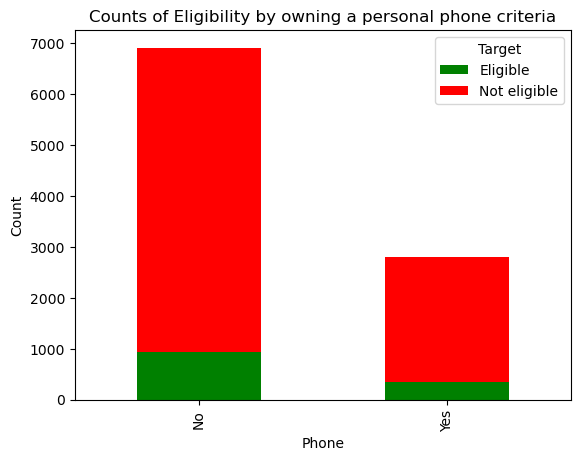

In [27]:
gender_target_counts = df.groupby(['Phone', 'Target']).size().unstack()
gender_target_counts.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.xlabel('Phone')
plt.ylabel('Count')
plt.title('Counts of Eligibility by owning a personal phone criteria')
plt.legend(title='Target')
plt.show()

* A major proportion of the people do not own a phone and the majority of them is not eligible

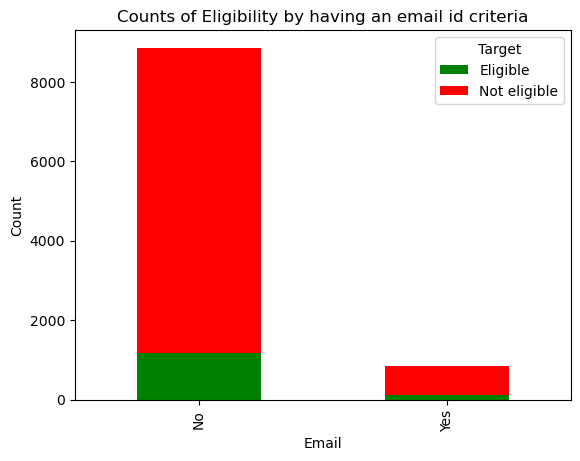

In [28]:
gender_target_counts = df.groupby(['Email', 'Target']).size().unstack()
gender_target_counts.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.xlabel('Email')
plt.ylabel('Count')
plt.title('Counts of Eligibility by having an email id criteria')
plt.legend(title='Target')
plt.show()

* A major proportion of the people do not own email and the majority of them is not eligible

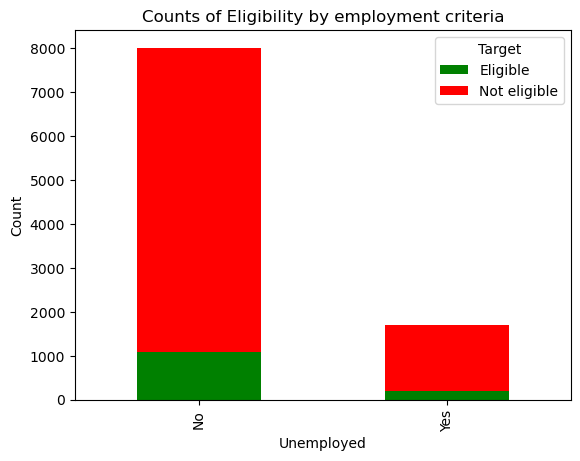

In [29]:
gender_target_counts = df.groupby(['Unemployed', 'Target']).size().unstack()
gender_target_counts.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.xlabel('Unemployed')
plt.ylabel('Count')
plt.title('Counts of Eligibility by employment criteria')
plt.legend(title='Target')
plt.show()

* A major proportion of the people is unemployed and the majority of them is not eligible and also those who are employed most of them are not eligible

### We have given a brief overview of all the categorical variables

### Now lets start analyzing the numerical coloumn

In [30]:
df.describe().transpose()

count          mean           std           min  \
ID              9709.0  5.076105e+06  40802.696053  5.008804e+06   
Num_children    9709.0  4.228036e-01      0.767019  0.000000e+00   
Num_family      9709.0  2.182614e+00      0.932918  1.000000e+00   
Account_length  9709.0  2.727006e+01     16.648057  0.000000e+00   
Total_income    9709.0  1.812282e+05  99277.305097  2.700000e+04   
Age             9709.0  4.378409e+01     11.625768  2.050419e+01   
Years_employed  9709.0  5.664730e+00      6.342241  0.000000e+00   

                         25%           50%           75%           max  
ID              5.036955e+06  5.069449e+06  5.112986e+06  5.150479e+06  
Num_children    0.000000e+00  0.000000e+00  1.000000e+00  1.900000e+01  
Num_family      2.000000e+00  2.000000e+00  3.000000e+00  2.000000e+01  
Account_length  1.300000e+01  2.600000e+01  4.100000e+01  6.000000e+01  
Total_income    1.125000e+05  1.575000e+05  2.250000e+05  1.575000e+06  
Age             3.405956e+01  4.274147e+01  5.356715e+01  6.886384e+01  
Years_employed  9.281505e-01  3.761884e+00  8.200031e+00  4.302073e+01

### Data visualization for numerical factors and proportion of them based on eligibility criteria

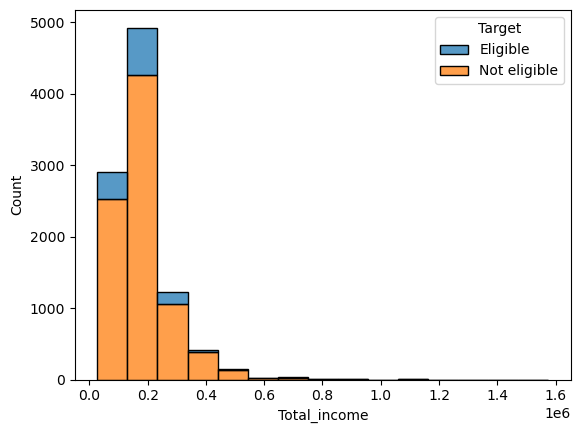

In [31]:
sns.histplot(data=df,x='Total_income',hue='Target',multiple='stack',bins=15,);

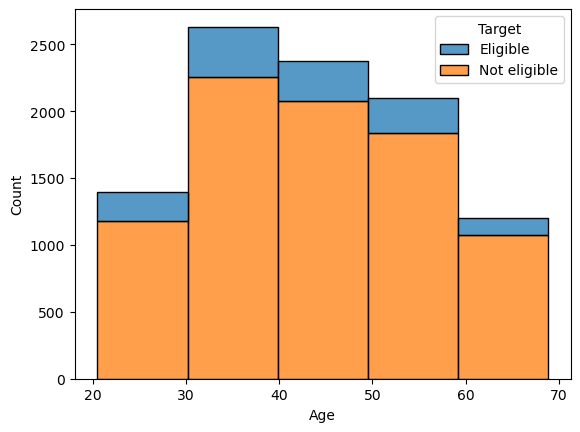

In [32]:
sns.histplot(data=df,x='Age',hue='Target',multiple='stack',bins=5,);

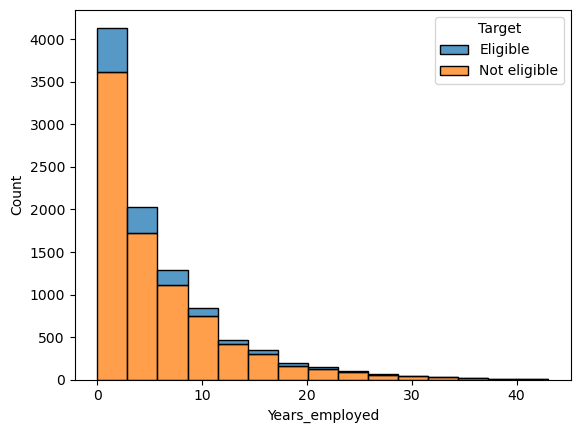

In [33]:
sns.histplot(data=df,x='Years_employed',hue='Target',multiple='stack',bins=15,);

In [34]:
fig = px.histogram(df['Num_children'], x='Num_children', title='Distribution of Number of Children per Customer')
fig.show()

In [35]:
fig = px.histogram(df['Num_family'], x='Num_family', title='Distribution of Number of Family Members per Customer')
fig.show()

In [36]:
fig = px.histogram(df['Total_income'], x='Total_income', title='Distribution of Total Income per Customer',nbins=20)
fig.show()

### Let us check how the averages of certain factors vary over eligibilty criteria

In [37]:
df.groupby('Target')[['Age','Total_income','Years_employed']].mean()

Age   Total_income  Years_employed
Target                                                
Eligible      42.483559  186007.008963        5.512841
Not eligible  43.982121  180500.539817        5.687858

### Percentages of people who are eligible based on certain categories

Percentage of people eligible or not eligible based on Income_type:
Income_type   Commercial associate  Pensioner  State servant  Student  Working
Target                                                                        
Eligible                       3.0        2.0            1.0      0.0      7.0
Not eligible                  21.0       15.0            7.0      0.0     44.0



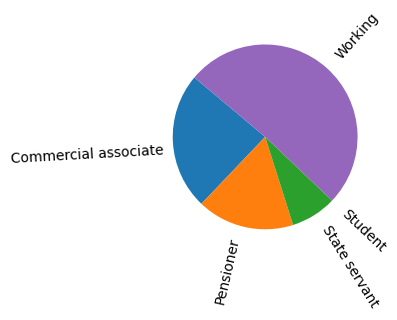

Percentage of people eligible or not eligible based on Education_type:
Education_type  Academic degree  Higher education  Incomplete higher  \
Target                                                                 
Eligible                    0.0               3.0                1.0   
Not eligible                0.0              22.0                3.0   

Education_type  Lower secondary  Secondary / secondary special  
Target                                                          
Eligible                    0.0                            9.0  
Not eligible                1.0                           61.0  



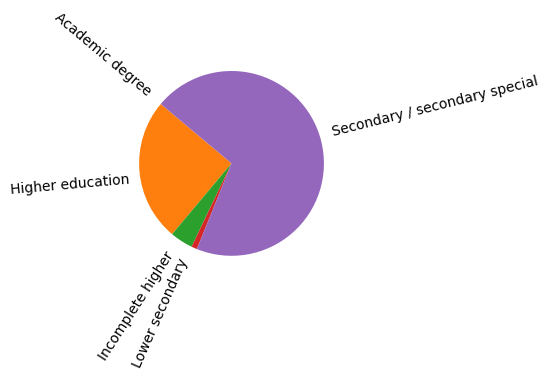

Percentage of people eligible or not eligible based on Family_status:
Family_status  Civil marriage  Married  Separated  Single / not married  Widow
Target                                                                        
Eligible                  1.0      9.0        1.0                   2.0    0.0
Not eligible              7.0     59.0        5.0                  12.0    4.0



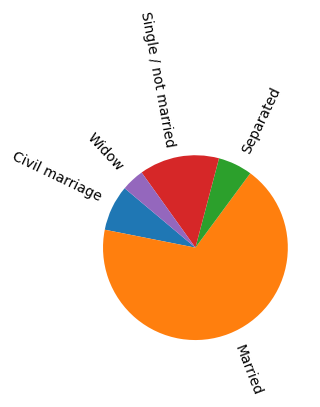

Percentage of people eligible or not eligible based on Housing_type:
Housing_type  Co-op apartment  House / apartment  Municipal apartment  \
Target                                                                  
Eligible                  0.0               12.0                  1.0   
Not eligible              0.0               78.0                  3.0   

Housing_type  Office apartment  Rented apartment  With parents  
Target                                                          
Eligible                   0.0               0.0           1.0  
Not eligible               1.0               1.0           4.0  



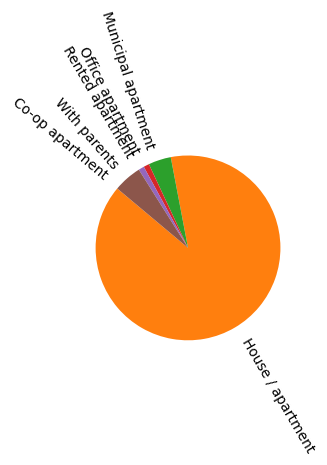

Percentage of people eligible or not eligible based on Occupation_type:
Occupation_type  Accountants  Cleaning staff  Cooking staff  Core staff  \
Target                                                                    
Eligible                 0.0             0.0            0.0         1.0   
Not eligible             3.0             1.0            2.0         8.0   

Occupation_type  Drivers  HR staff  High skill tech staff  IT staff  Laborers  \
Target                                                                          
Eligible             1.0       0.0                    1.0       0.0       2.0   
Not eligible         6.0       0.0                    3.0       0.0      15.0   

Occupation_type  Low-skill Laborers  Managers  Medicine staff  Other  \
Target                                                                 
Eligible                        0.0       1.0             0.0    4.0   
Not eligible                    0.0       7.0             3.0   27.0   

Occupation_ty

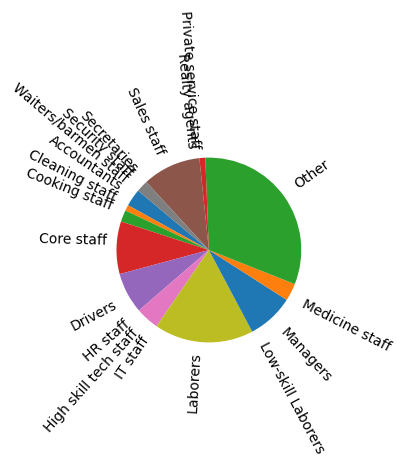

In [38]:
for col in categorical_cols:
    
    grouped = (df.groupby('Target')[col].value_counts()/len(df)).unstack() * 100
    grouped = grouped.round(0)  
    print(f"\033[1mPercentage of people eligible or not eligible based on {col}:\033[0m\n{grouped}\n")
    
    labels = grouped.columns  
    sizes = grouped.sum()  
    
    # Draw the pie chart
    plt.figure(figsize=(3,3))
    plt.pie(sizes, labels=labels, startangle=140,rotatelabels=True)
    #plt.title(f'Distribution of {col}')
    plt.show() 
   


### Proportion of people owning the following asset and whether they are eligible or not eligible 

Percentages for Gender:
Gender        Female  Male
Target                    
Eligible         5.0   8.0
Not eligible    30.0  57.0



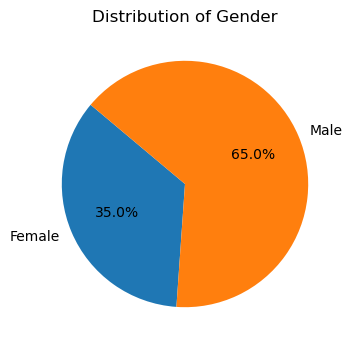

Percentages for Own_car:
Own_car         No   Yes
Target                  
Eligible       8.0   5.0
Not eligible  55.0  32.0



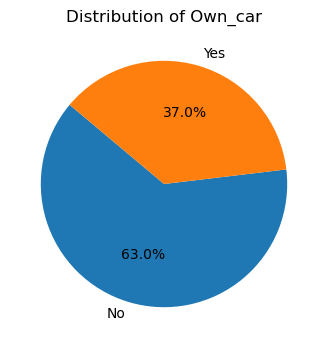

Percentages for Own_property:
Own_property    No   Yes
Target                  
Eligible       5.0   8.0
Not eligible  28.0  59.0



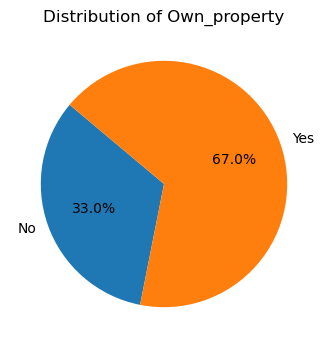

Percentages for Work_phone:
Work_phone      No   Yes
Target                  
Eligible      10.0   3.0
Not eligible  68.0  19.0



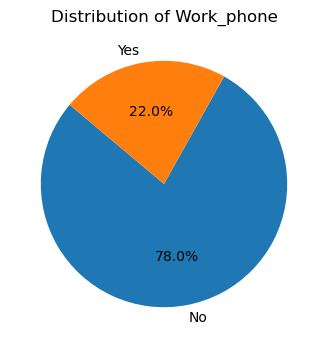

Percentages for Phone:
Phone           No   Yes
Target                  
Eligible      10.0   4.0
Not eligible  62.0  25.0



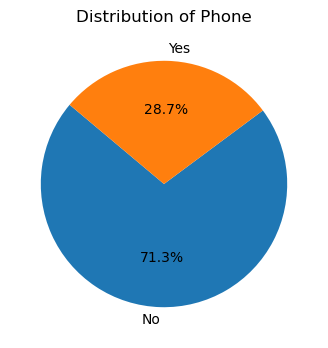

Percentages for Email:
Email           No  Yes
Target                 
Eligible      12.0  1.0
Not eligible  79.0  8.0



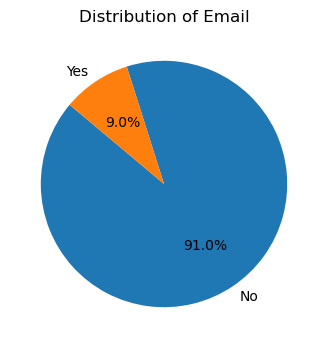

Percentages for Unemployed:
Unemployed      No   Yes
Target                  
Eligible      11.0   2.0
Not eligible  71.0  15.0



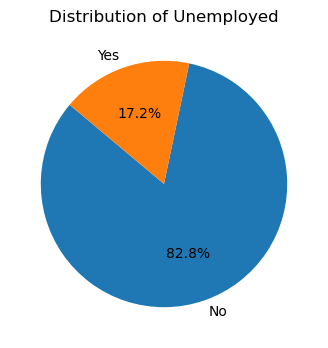

In [39]:
binary_cols = ['Gender','Own_car', 'Own_property', 'Work_phone', 'Phone', 'Email', 'Unemployed']

for col in binary_cols:
    
    grouped1 = (df.groupby('Target')[col].value_counts()/len(df)).unstack() * 100
    grouped1 = grouped1.round(0)  
    print(f"\033[1mPercentages for {col}:\033[0m\n{grouped1}\n")
    
       
    labels = grouped1.columns  
    sizes = grouped1.sum()  
    
    # Draw the pie chart
    plt.figure(figsize=(4,4))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of {col}')
    plt.show()
    


### Are there any correlations between user profile features (e.g., age, income, employment status) and their eligibility profiles?

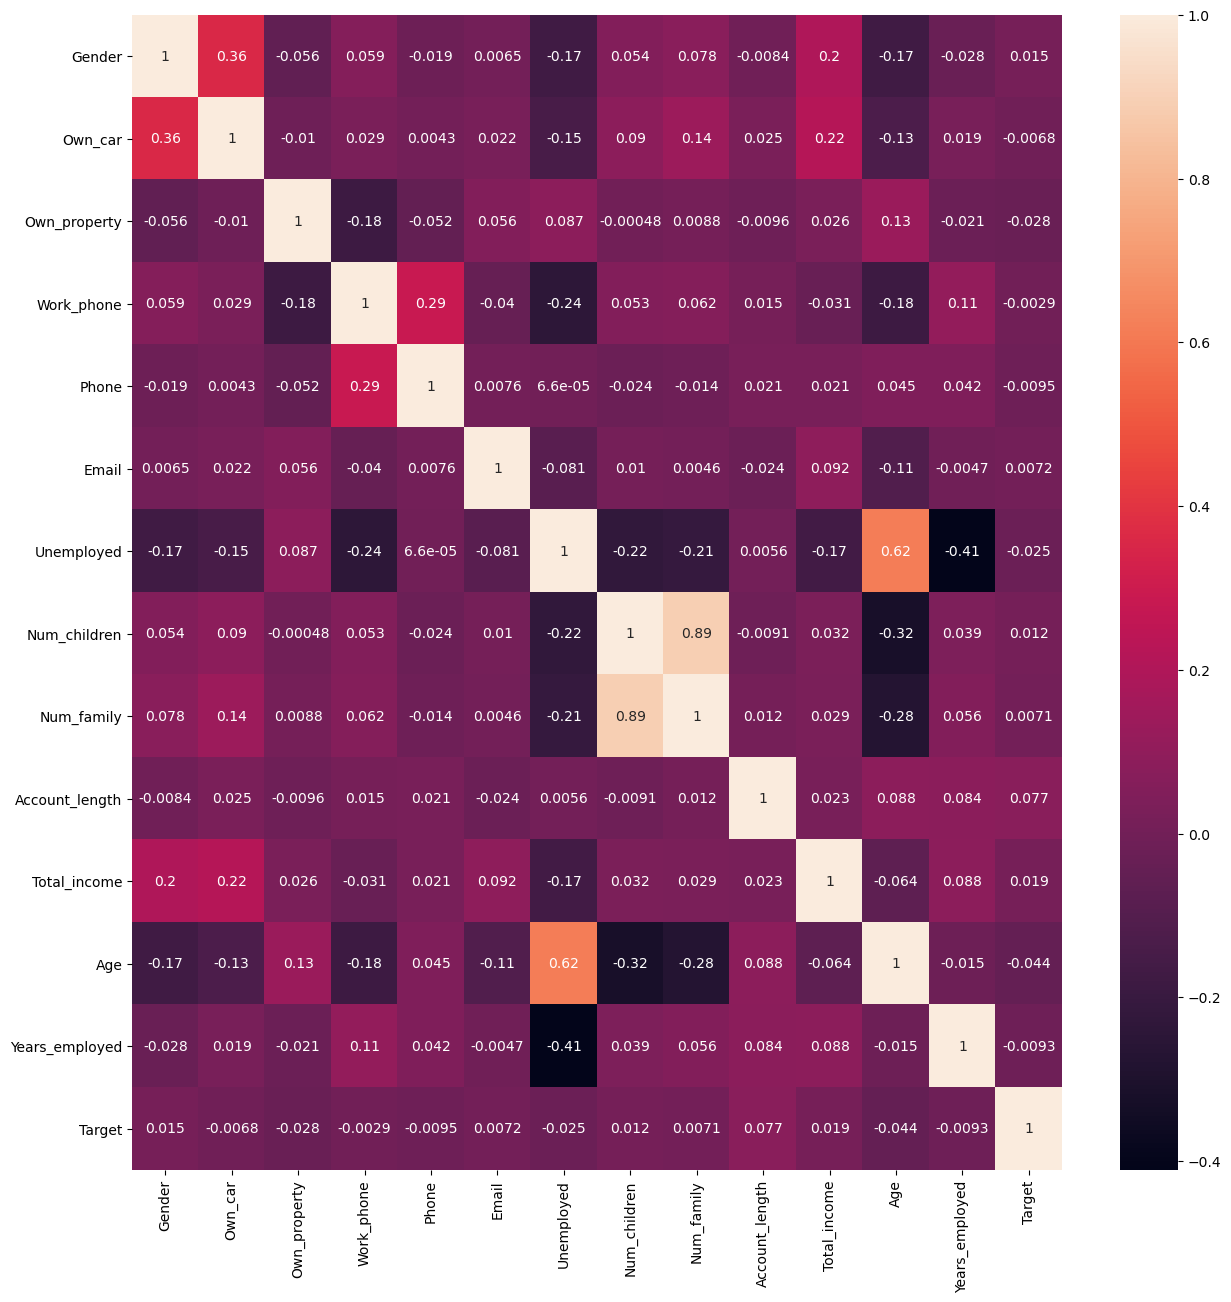

In [40]:
plt.figure(figsize=(15,15))
sns.heatmap(data=df1.drop(['ID','Income_type','Education_type','Family_status','Housing_type','Occupation_type'],axis=1).corr(),annot=True);

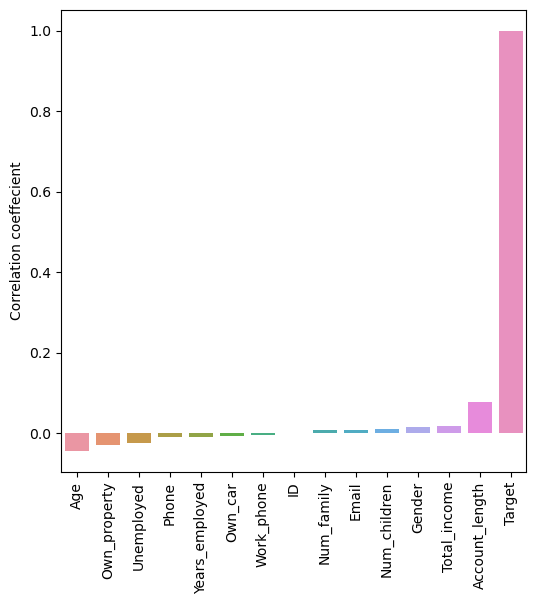

In [41]:
reln = df1.corr()['Target'].sort_values()
reln = pd.DataFrame(data=reln)
plt.figure(figsize=(6,6))
sns.barplot(data=reln,y='Target',x=reln.index)
plt.ylabel('Correlation coeffecient')
plt.xticks(rotation=90);

# CLASSIFICATION TASK

### So our data analysis is over and we move forward for the classification task 

In [42]:
df1=pd.read_csv('credit_cards_data.csv')
df1

ID  Gender  Own_car  Own_property  Work_phone  Phone  Email  \
0     5008804       1        1             1           1      0      0   
1     5008806       1        1             1           0      0      0   
2     5008808       0        0             1           0      1      1   
3     5008812       0        0             1           0      0      0   
4     5008815       1        1             1           1      1      1   
...       ...     ...      ...           ...         ...    ...    ...   
9704  5148694       0        0             0           0      0      0   
9705  5149055       0        0             1           1      1      0   
9706  5149729       1        1             1           0      0      0   
9707  5149838       0        0             1           0      1      1   
9708  5150337       1        0             1           0      0      0   

      Unemployed  Num_children  Num_family  Account_length  Total_income  \
0              0             0           2              15      427500.0   
1              0             0           2              29      112500.0   
2              0             0           1               4      270000.0   
3              1             0           1              20      283500.0   
4              0             0           2               5      270000.0   
...          ...           ...         ...             ...           ...   
9704           0             0           2              20      180000.0   
9705           0             0           2              19      112500.0   
9706           0             0           2              21       90000.0   
9707           0             0           2              32      157500.0   
9708           0             0           1              13      112500.0   

            Age  Years_employed           Income_type  \
0     32.868574       12.435574               Working   
1     58.793815        3.104787               Working   
2     52.321403        8.353354  Commercial associate   
3     61.504343        0.000000             Pensioner   
4     46.193967        2.105450               Working   
...         ...             ...                   ...   
9704  56.400884        0.542106             Pensioner   
9705  43.360233        7.375921  Commercial associate   
9706  52.296762        4.711938               Working   
9707  33.914454        3.627727             Pensioner   
9708  25.155890        3.266323               Working   

                     Education_type         Family_status  \
0                  Higher education        Civil marriage   
1     Secondary / secondary special               Married   
2     Secondary / secondary special  Single / not married   
3                  Higher education             Separated   
4                  Higher education               Married   
...                             ...                   ...   
9704  Secondary / secondary special        Civil marriage   
9705  Secondary / secondary special               Married   
9706  Secondary / secondary special               Married   
9707               Higher education               Married   
9708  Secondary / secondary special  Single / not married   

             Housing_type Occupation_type  Target  
0        Rented apartment           Other       1  
1       House / apartment  Security staff       0  
2       House / apartment     Sales staff       0  
3       House / apartment           Other       0  
4       House / apartment     Accountants       0  
...                   ...             ...     ...  
9704  Municipal apartment        Laborers       1  
9705    House / apartment           Other       1  
9706    House / apartment           Other       1  
9707    House / apartment  Medicine staff       1  
9708     Rented apartment        Laborers       1  

[9709 rows x 20 columns]

### Selecting all the coloumns except 'ID' and 'Target' and assigning them to X

In [43]:
X = df1.iloc[:,1:-1]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           9709 non-null   int64  
 1   Own_car          9709 non-null   int64  
 2   Own_property     9709 non-null   int64  
 3   Work_phone       9709 non-null   int64  
 4   Phone            9709 non-null   int64  
 5   Email            9709 non-null   int64  
 6   Unemployed       9709 non-null   int64  
 7   Num_children     9709 non-null   int64  
 8   Num_family       9709 non-null   int64  
 9   Account_length   9709 non-null   int64  
 10  Total_income     9709 non-null   float64
 11  Age              9709 non-null   float64
 12  Years_employed   9709 non-null   float64
 13  Income_type      9709 non-null   object 
 14  Education_type   9709 non-null   object 
 15  Family_status    9709 non-null   object 
 16  Housing_type     9709 non-null   object 
 17  Occupation_typ

### Creating dummy variables for categorical variables

In [44]:
X=pd.get_dummies(X,drop_first=True)

In [45]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9709 entries, 0 to 9708
Data columns (total 48 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Gender                                        9709 non-null   int64  
 1   Own_car                                       9709 non-null   int64  
 2   Own_property                                  9709 non-null   int64  
 3   Work_phone                                    9709 non-null   int64  
 4   Phone                                         9709 non-null   int64  
 5   Email                                         9709 non-null   int64  
 6   Unemployed                                    9709 non-null   int64  
 7   Num_children                                  9709 non-null   int64  
 8   Num_family                                    9709 non-null   int64  
 9   Account_length                                9709 non-null   i

### Setting y as the target coloumn

In [46]:
y=df1['Target']
y

0       1
1       0
2       0
3       0
4       0
       ..
9704    1
9705    1
9706    1
9707    1
9708    1
Name: Target, Length: 9709, dtype: int64

### Splitting the dataset into trainning and testing set

In [47]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [48]:
scaler=StandardScaler()

In [49]:
sm=SMOTE(random_state=101)

### Applying SMOTE to synthetically generate samples for having a better balanced dataset

In [50]:
X_train_res,y_train_res = sm.fit_resample(X_train,y_train)

In [51]:
print(f'X_train_res: {len(X_train_res)}\ny_train_res: {len(y_train_res)}')

X_train_res: 11740
y_train_res: 11740


In [52]:
y_train_res.value_counts()

1    5870
0    5870
Name: Target, dtype: int64

### Thus we can see, from a highly imbalanced dataset we have created a balanced dataset 

### Through the method of synthetic minority sampling technique (SMOTE) we increased the number of 'eligible' class to have more unbiased and better performance

In [53]:
X_train_res.select_dtypes(include=['float'])

Total_income        Age  Years_employed
0          135000.0  34.292285        0.391521
1           81000.0  34.344305        2.047954
2          135000.0  39.048030        5.117148
3          405000.0  36.252627        5.404628
4          135000.0  60.170982       25.865008
...             ...        ...             ...
11735      112500.0  54.008354       15.740416
11736       90000.0  53.246769        1.806417
11737      157500.0  56.310099        0.885887
11738      270000.0  54.369184        2.192438
11739      112500.0  53.420072        1.814534

[11740 rows x 3 columns]

### So we can see we need to scale our data and hence we use Standard Scaler

In [54]:
scaled_X_train = scaler.fit_transform(X_train_res)

In [55]:
scaled_X_test = scaler.transform(X_test)

# LOGISTIC REGRESSION


In [56]:
log_model = LogisticRegression()

In [57]:
log_model.fit(scaled_X_train,y_train_res)

LogisticRegression()

In [58]:
y_preds = log_model.predict(scaled_X_test)

In [59]:
y_preds

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [60]:
accuracy_score(y_test,y_preds)

0.8499828355647099

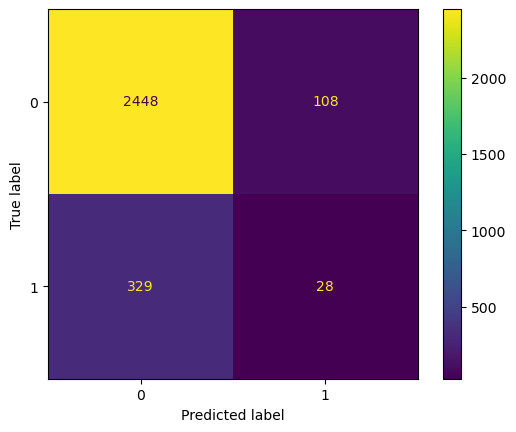

In [61]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)

In [62]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2556
           1       0.21      0.08      0.11       357

    accuracy                           0.85      2913
   macro avg       0.54      0.52      0.52      2913
weighted avg       0.80      0.85      0.82      2913



### Performing Grid search for hyper parameter tuning

In [63]:
log = LogisticRegression(solver='liblinear', random_state=42)

param_grid = {
    'C': [0.1, 1, 10, 100],              
    'penalty': ['l1', 'l2'],            
    'class_weight': [None, 'balanced']   
}

* C: Inverse of regularization strength; smaller values specify stronger regularization.
* penalty: Specifies the norm used in the penalization ('l1' for Lasso or 'l2' for Ridge).
* class_weight: Weights associated with classes. If 'balanced', class weights are inversely proportional to class frequencies

In [64]:
grid_search = GridSearchCV(log, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)


* cv=5: This sets up 5-fold cross-validation.
* scoring='f1': Since  class imbalance, using the F1 score (which balances precision and recall) is often a good choice.
* n_jobs=-1: Utilizes all available CPU cores for parallel processing.
* verbose=1: Provides output during the search process, which can be helpful for understanding progress.

In [65]:
grid_search.fit(scaled_X_train,y_train_res)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=42, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2']},
             scoring='f1', verbose=1)

In [66]:
grid_search.best_params_

{'C': 100, 'class_weight': None, 'penalty': 'l2'}

In [67]:
grid_preds = grid_search.predict(scaled_X_test)

In [68]:
accuracy_score(y_test,grid_preds)

0.8510127016821146

In [69]:
print(classification_report(y_test,grid_preds))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2556
           1       0.21      0.08      0.12       357

    accuracy                           0.85      2913
   macro avg       0.55      0.52      0.52      2913
weighted avg       0.80      0.85      0.82      2913



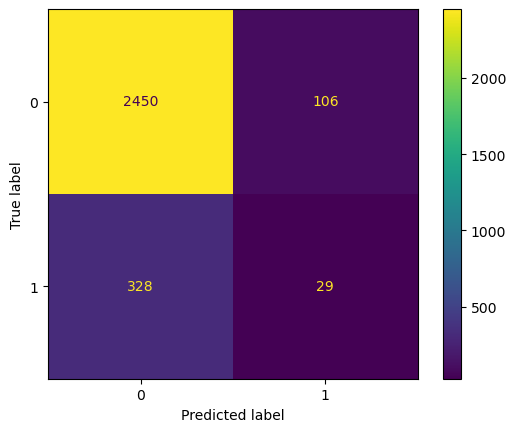

In [70]:
plot_confusion_matrix(grid_search,scaled_X_test,y_test)

* Thus we have an accuracy score of 85%
* F1 Score : 0.92